In [248]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

## 数据处理

In [249]:
# df = pd.read_csv('./data/Credit.csv')
df = pd.read_csv('./data/Default.csv')
# df.drop(columns=df.columns[0],axis=1,inplace=True)
type_dict = {
    "Yes":1,
    "No":0,
}
df['default'] = df['default'].map(type_dict)
df['student'] = df['student'].map(type_dict)
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [341]:
print(df.info())
# print(df.describe())
# print(df.shape)
# print(df.corr())
print(df['default'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB
None
0    9667
1     333
Name: default, dtype: int64


In [304]:
# df_stu = df[(df['default']==1) & (df['student']==0)]
# df_bal = df[(df['default']==1) & (df['balance']==0)]
# df_in = df[(df['default']==1) & (df['student']==0)]
# subdf.shape

#1.根据是否是学生绘制违约的数量
#2.根据收入绘制违约分布
#3.根据贷款量绘制违约分布

#===>分箱
# cuts_bal = np.linspace(0,3000,4)
# cuts_income = np.linspace(0,75000,6)

# print(cuts_bal)
# bal = pd.cut(df['balance'],cuts_bal,include_lowest=True)
# income = pd.cut(df['income'],cuts_income,include_lowest=True)
# print(bal.value_counts())
# # print(income.value_counts())
# # print(bal)
# X = ['0-1000','1000-2000','2000-3000']
# Y = bal.value_counts()

# fig, ax = plt.subplots()
# ax.bar(X,Y)
# for a,b in zip(X,Y): 
#  plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
# plt.xlabel('balance')
# plt.ylabel('count')
# plt.show()

# print(df.groupby('default').groups.values())
# pieces=np.array(df.groupby('default'))
# print(pieces[0][1])
# print(pieces[1][1])


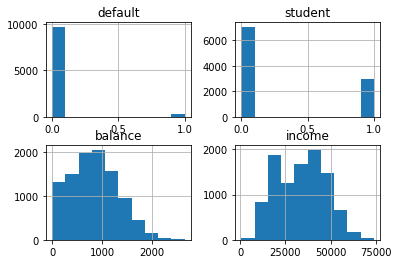

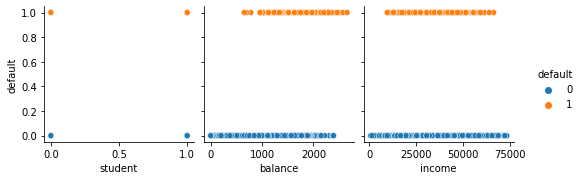

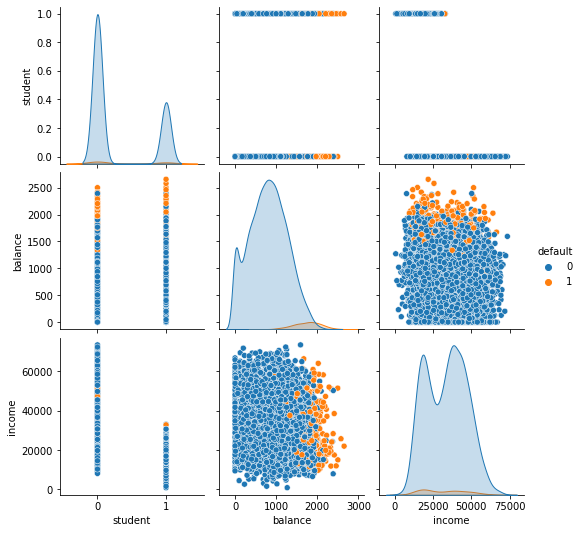

In [129]:
df.hist()
sb.pairplot(df,x_vars=['student','balance','income'],y_vars='default',hue='default',kind='scatter')
sb.pairplot(df,hue='default')

# Logistic regression

In [72]:
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split

In [325]:
X = df.iloc[:,1:]
y = df['default']
print('X and y sizes:', len(X), len(y))

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

print("Total number of frauds:",len(y.loc[df['default']==1]),'rate:',len(y.loc[df['default']==1])/len(y),'%')
print("Number of frauds on y_test:", len(y_test.loc[df['default'] == 1]), 'rate:',len(y_test.loc[df['default'] == 1]) / len(y_test),'%')
print("Number of frauds on y_train:", len(y_train.loc[df['default'] == 1]), 'rate:',len(y_train.loc[df['default'] == 1])/len(y_train),'%')

X and y sizes: 10000 10000
Total number of frauds: 333 rate: 0.0333 %
Number of frauds on y_test: 69 rate: 0.0345 %
Number of frauds on y_train: 264 rate: 0.033 %


## 决策边界

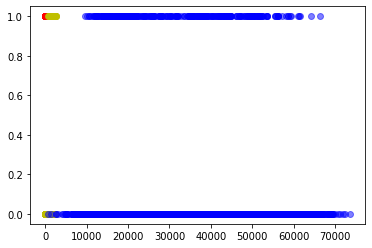

In [350]:
#TODO
plt.scatter(X['student'],y,label='student',c='r',alpha=0.5)
plt.scatter(X['balance'],y,label='balance',c='y',alpha=0.5)
plt.scatter(X['income'],y,label='income',c='b',alpha=0.5)
plt.show()


In [344]:
logistic = lm.LogisticRegression(C=1e5)
logistic.fit(X_train,y_train)
print('interpret=',logistic.intercept_)
print('coefficient=',logistic.coef_)
print('Accuracy from sk-learn:',logistic.score(X_test,y_test))

interpret= [-10.79616422]
coefficient= [[-6.94284221e-01  5.77421875e-03 -1.21691066e-06]]
Accuracy from sk-learn: 0.9715


In [310]:
y_pred = logistic.predict(X_test)

In [ ]:
def perf_measure(y_true, y_pred):
    TP, FP, TN, FN = 0, 0, 0, 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
           TP += 1
        if y_true[i] == 0 and y_pred[i] == 1:
           FP += 1
        if y_true[i] == 0 and y_pred[i] == 0:
           TN += 1
        if y_true[i] == 1 and y_pred[i] == 0:
           FN += 1

    return TP, FP, TN, FN

## 混淆矩阵

[[1916   14]
 [  47   23]]


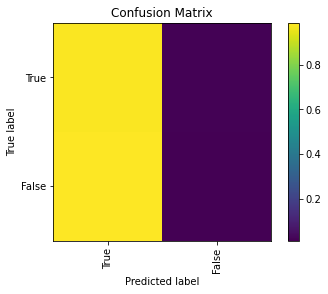

In [328]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test,y_pred)
print(c_mat)
plot_confusion_matrix(cm, ['True','False'], "Confusion Matrix")